**Importing dependencies**

In [60]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, classification_report,precision_score, recall_score, f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


**Reading the Dataset and seeing the datapoints**

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/project/diabetes 9.csv")
dataset.shape

(768, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             737 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


<Axes: >

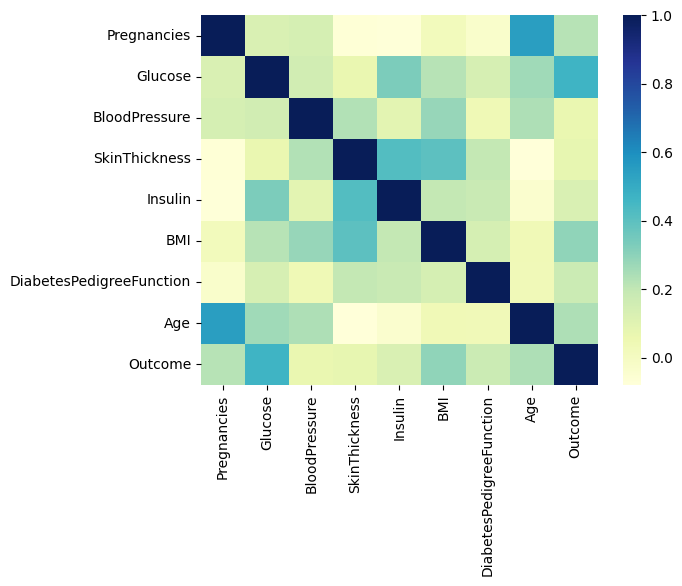

In [5]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu')

**Imbalaced dataset**

In [6]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

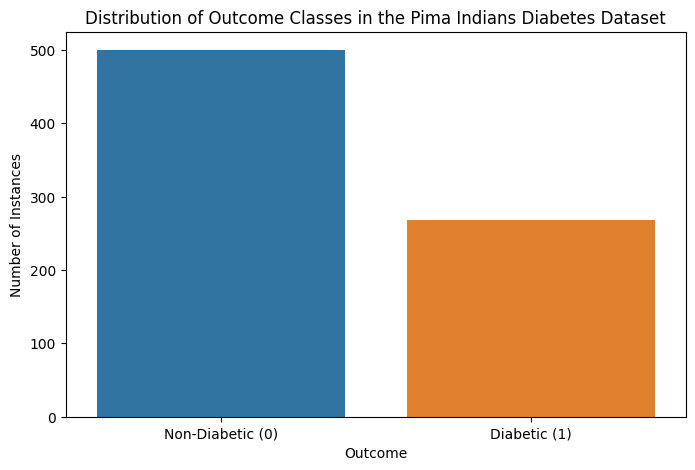

In [10]:
class_counts = dataset['Outcome'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Outcome Classes in the Pima Indians Diabetes Dataset')
plt.xlabel('Outcome')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'])
plt.show()


**Data pre-processing**

In [11]:
dataset.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness               31
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

**Handling with Null values**

In [12]:
mean = dataset['SkinThickness'].mean()
mode = dataset['SkinThickness'].mode().values[0]
median = dataset['SkinThickness'].median()

print('Mean:', mean)
print('Mode:', mode)
print('Median:', median)

Mean: 21.400271370420626
Mode: 0.0
Median: 24.0


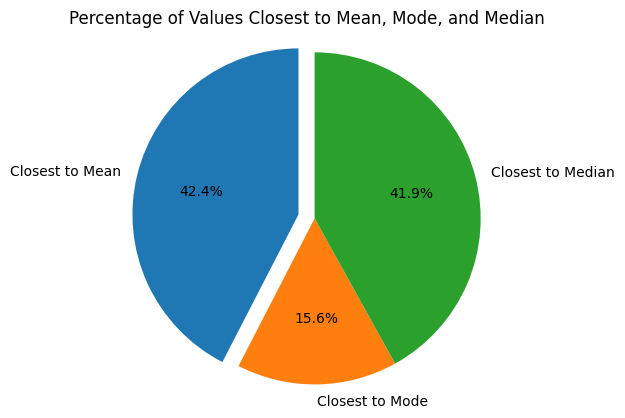

In [13]:
# calculate the percentage of values that are closest to mean, mode, and median
dataset['closest_to_mean'] = abs(dataset['SkinThickness'] - mean) <= abs(dataset['SkinThickness'] - mode)
dataset['closest_to_mode'] = dataset['SkinThickness'] == mode
dataset['closest_to_median'] = abs(dataset['SkinThickness'] - median) <= abs(dataset['SkinThickness'] - mode)

# calculate the percentage of values that are closest to mean, mode, and median with respect to all values in the column
percentage_closest_to_mean = round((dataset['closest_to_mean'].sum() / dataset['SkinThickness'].count()) * 100, 2)
percentage_closest_to_mode = round((dataset['closest_to_mode'].sum() / dataset['SkinThickness'].count()) * 100, 2)
percentage_closest_to_median = round((dataset['closest_to_median'].sum() / dataset['SkinThickness'].count()) * 100, 2)

# create a pie chart showing the percentage of values that are closest to mean, mode, and median with respect to all values in the column
labels = ['Closest to Mean', 'Closest to Mode', 'Closest to Median']
sizes = [percentage_closest_to_mean, percentage_closest_to_mode, percentage_closest_to_median]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
explode = (0.1, 0, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Values Closest to Mean, Mode, and Median')
plt.show()

In [14]:

#imputing
impute = SimpleImputer(missing_values=np.nan, strategy='median')
impute.fit(dataset[['SkinThickness']])
dataset['SkinThickness'] = impute.transform(dataset[['SkinThickness']])

In [15]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
closest_to_mean             0
closest_to_mode             0
closest_to_median           0
dtype: int64

**Spliting the dataset**

In [32]:
# Retain Feature Names
feature_names = dataset.drop("Outcome", axis=1).columns

X = dataset.drop("Outcome",axis=1).values
y = dataset["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=2)

In [33]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (537, 11)
y_train shape: (537,)


In [34]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (231, 11)
y_test shape: (231,)


**Feature scaling**

In [35]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,closest_to_mean,closest_to_mode,closest_to_median
0,6,148,72,35.0,0,33.6,0.627,50,1,True,False,True
1,1,85,66,29.0,0,26.6,0.351,31,0,True,False,True
2,8,183,64,0.0,0,23.3,0.672,32,1,False,True,False
3,1,89,66,23.0,94,28.1,0.167,21,0,True,False,True
4,0,137,40,35.0,168,43.1,2.288,33,1,True,False,True


**Applying Decision Tree on our dataset**

In [51]:
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

y_true = y_test # true class labels of test set

cm = confusion_matrix(y_true, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy2 * 100))
print(cm)


F1 accuracy:50.00%
Accuracy: 68.83%
[[123  27]
 [ 45  36]]


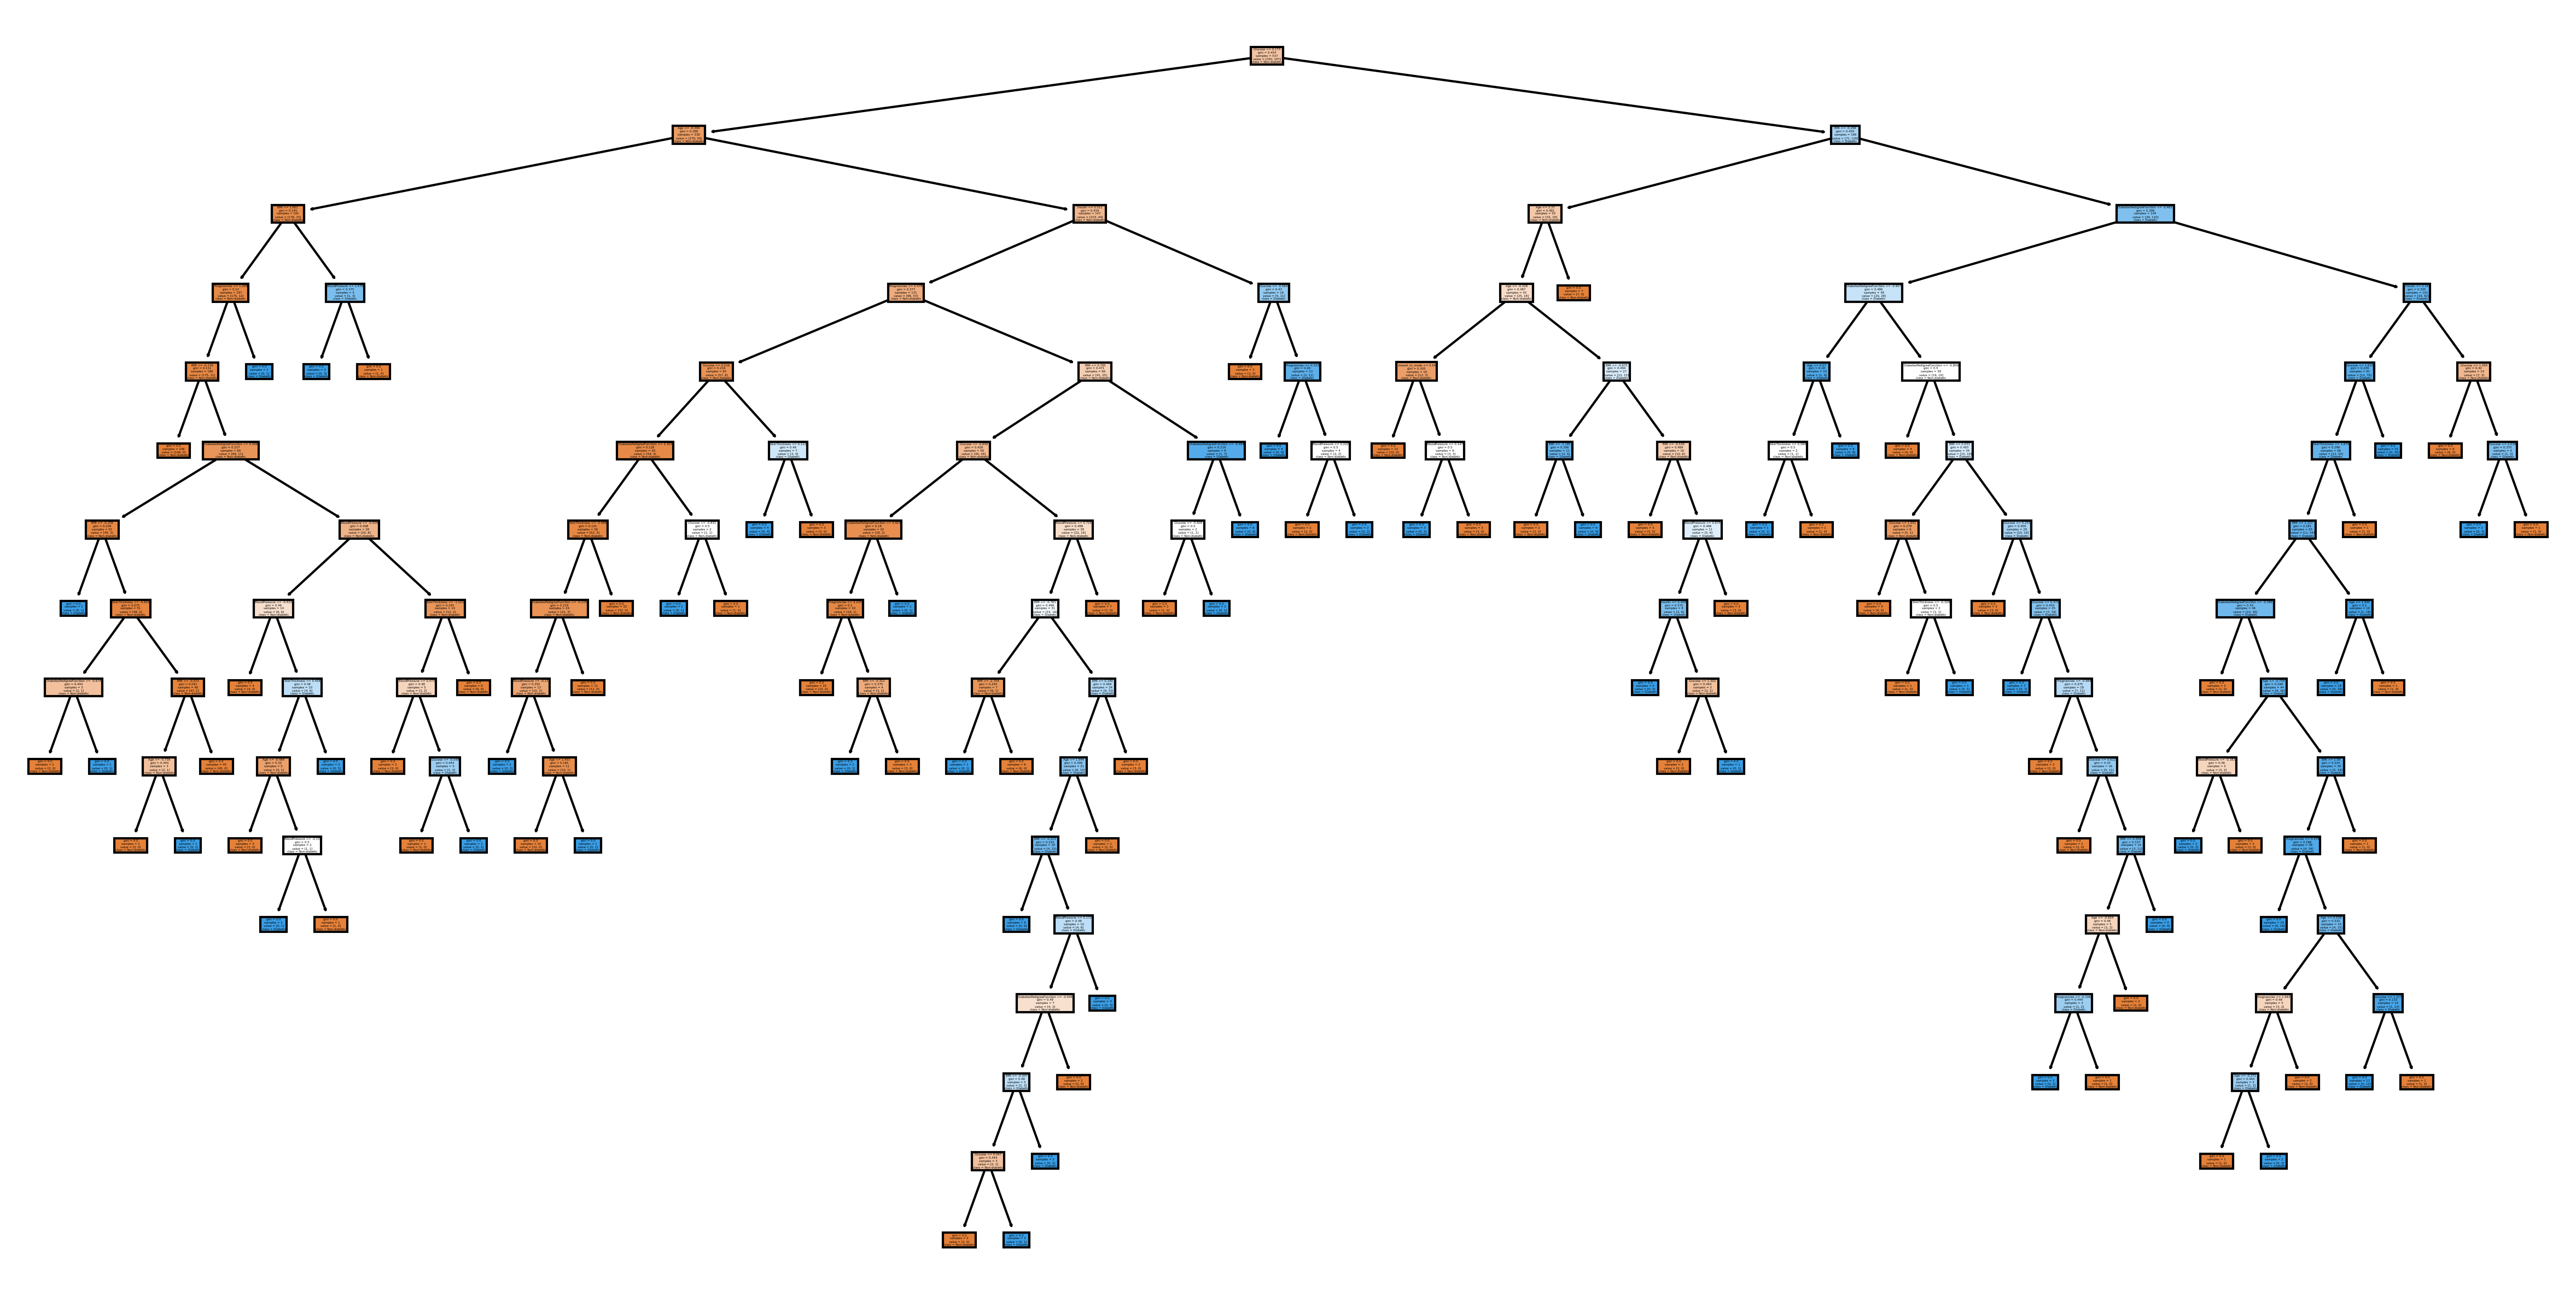

In [56]:
# Visualize the decision tree
plt.figure(figsize=(20,10), dpi=300)
plot_tree(clf, feature_names=feature_names, class_names=['Non-diabetic', 'Diabetic'], filled=True)
plt.show()

<Axes: >

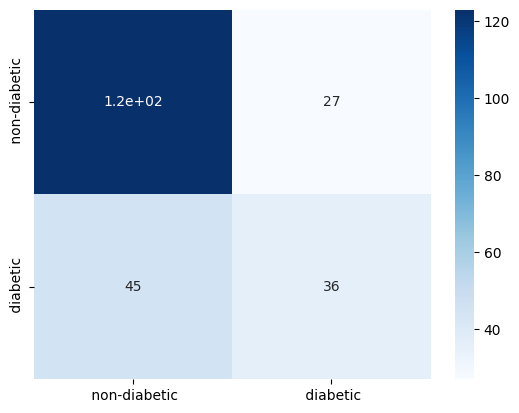

In [53]:

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=[' non-diabetic' ,' diabetic'],yticklabels=[' non-diabetic' ,' diabetic'])

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       150
           1       0.57      0.44      0.50        81

    accuracy                           0.69       231
   macro avg       0.65      0.63      0.64       231
weighted avg       0.68      0.69      0.68       231



**Applying Logistic Regression on our dataset**

In [57]:

model = LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

y_true = y_test # true class labels of test set

cm = confusion_matrix(y_true, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy4 * 100))
print(cm)


F1 accuracy:58.02%
Accuracy: 76.19%
[[138  12]
 [ 43  38]]


<Axes: >

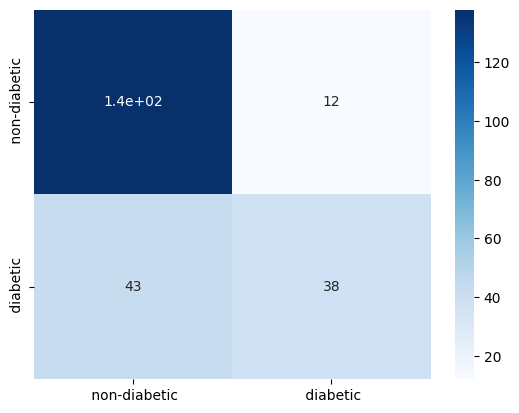

In [58]:
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=[' non-diabetic' ,' diabetic'],yticklabels=[' non-diabetic' ,' diabetic'])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       150
           1       0.76      0.47      0.58        81

    accuracy                           0.76       231
   macro avg       0.76      0.69      0.71       231
weighted avg       0.76      0.76      0.74       231



**Applying Support Vector Machine on our dataset**

In [61]:
clf = SVC(kernel='poly')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

y_true = y_test

cm = confusion_matrix(y_true, y_pred)


#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy3 * 100))
print(cm)

F1 accuracy:53.66%
Accuracy: 75.32%
[[141   9]
 [ 48  33]]


<Axes: >

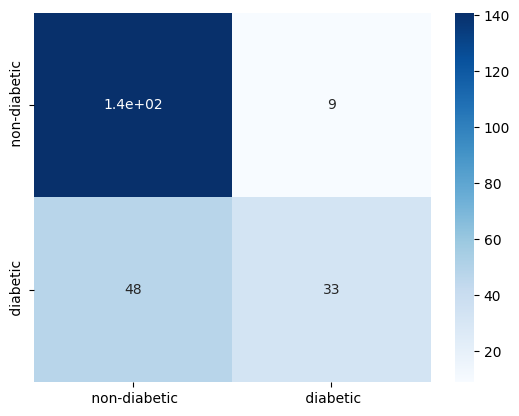

In [62]:
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=[' non-diabetic' ,' diabetic'],yticklabels=[' non-diabetic' ,' diabetic'])

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       150
           1       0.79      0.41      0.54        81

    accuracy                           0.75       231
   macro avg       0.77      0.67      0.68       231
weighted avg       0.76      0.75      0.73       231



**Bar chart showcasing prediction accuracy of all models**

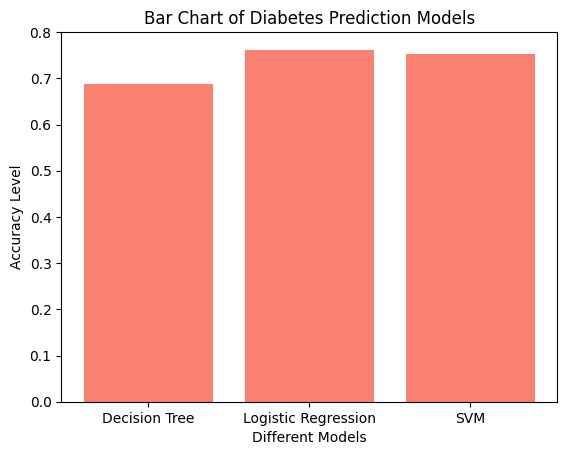

In [64]:
x_axis = ['Decision Tree', 'Logistic Regression', 'SVM']
y_axis = [accuracy2, accuracy4, accuracy3]

plt.bar(x_axis, y_axis,color= 'salmon')
plt.title('Bar Chart of Diabetes Prediction Models')
plt.xlabel('Different Models')
plt.ylabel('Accuracy Level')
plt.show()